# DALL-E : Text to Image
---
**Description**

<img src ='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbWwSSR%2FbtsiQ68Bgr2%2FQBks9JSKdnwfPq4xIYkQf0%2Fimg.jpg'>


- DALL•E is a text based image generation Model.

- It is a large language model (LLM) developed by OpenAI (2021).

> How does DALL-E works?
1. Input text prompts to text encoder.
2. Convert text description into vector representation.
3. Vector representation generate designated image using diffusion model.

**Reference**

[1] "DALLE mini", borisdayma, accesed 2023 04 15, https://github.com/borisdayma/dalle-mini.

[2] Ramesh, A., Pavlov, M., Goh, G., Gray, S., Voss, C., Radford, A., ... & Sutskever, I. (2021, July). Zero-shot text-to-image generation. In International Conference on Machine Learning (pp. 8821-8831). PMLR.

[3] Ramesh, A., Dhariwal, P., Nichol, A., Chu, C., & Chen, M. (2022). Hierarchical text-conditional image generation with clip latents. arXiv preprint arXiv:2204.06125.



### Install Library

In [1]:
! pip install min-dalle -q


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.7/353.7 kB 25.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


## Load Library

In [8]:
from min_dalle import MinDalle
from IPython.display import display, update_display
import torch
import numpy as np
from PIL import Image

## Create Model

---
**Hyperparameters:**
- `grid_size` Size of the image grid.  Reduce this if you run out of GPU memory.

- `progressive_outputs` Whether to show intermediate output.  Adds a small delay and increases memory usage.

- `seamless` Tiles the images in token space instead of pixel space

- `supercondition_factor` Higher values result in better agreement with the text but a narrower variety of generated images

- `top_k` Each image token is sampled from the top $k$ most probable tokens

In [2]:
# Define Data type 
dtype = "float16" #@param ["float32", "float16", "bfloat16"]

# Create Model1 
model = MinDalle(
    dtype=getattr(torch, dtype),
    device='cuda',
    is_mega=True, 
    is_reusable=True
)

using device cuda
intializing TextTokenizer
initializing DalleBartEncoder
initializing DalleBartDecoder
initializing VQGanDetokenizer


In [3]:
# Set Prompt, Hyperparameters
%%time

text = "little baby samoyed smiling in front of the time square" #@param {type:"string"}
progressive_outputs = True #@param {type:"boolean"}
seamless = False #@param {type:"boolean"}
grid_size = 3 #@param {type:"integer"}
temperature = 1 #@param {type:"slider", min:0.01, max:16, step:0.01}
supercondition_factor = 16 #@param {type:"number"}
top_k = 128 #@param {type:"integer"}

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.72 µs


## Visualization

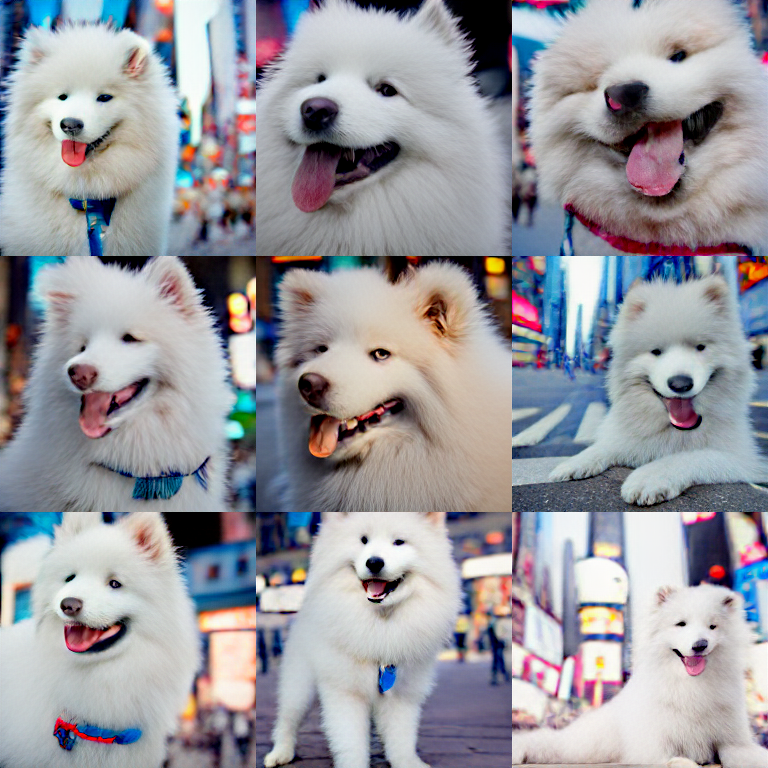

In [4]:
# Define Image stream
image_stream = model.generate_image_stream(
    text=text,
    seed=-1,
    grid_size=grid_size,
    progressive_outputs=progressive_outputs,
    is_seamless=seamless,
    temperature=temperature,
    top_k=int(top_k),
    supercondition_factor=float(supercondition_factor)
)

# Display Image
is_first = True
for image in image_stream:
    display_image = display if is_first else update_display
    display_image(image, display_id=1)
    is_first = False

## Save Individual Images


In [5]:
images = model.generate_images(
    text='little baby samoyed smiling in front of the time square',
    seed=-1,
    grid_size=3,
    is_seamless=False,
    temperature=1,
    top_k=256,
    supercondition_factor=16,
    is_verbose=False
)

In [6]:
images = images.to('cpu').numpy()

In [12]:
images.shape

(9, 256, 256, 3)

# Create Model2 - simple Version

---

## Create Model2

In [ ]:
model2 = MinDalle(is_mega=True, is_reusable=True)

using device cuda
intializing TextTokenizer
initializing DalleBartEncoder


## Visualization

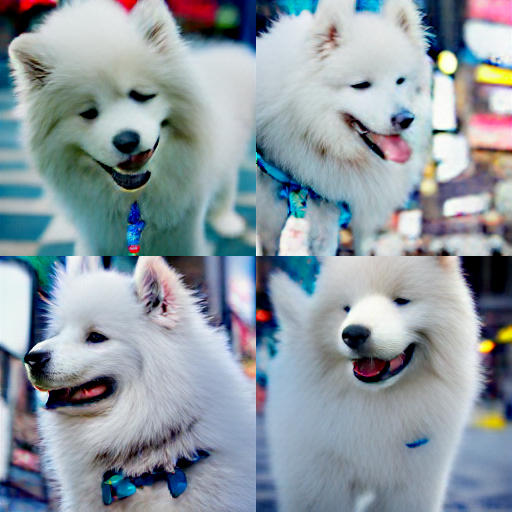

CPU times: user 29.6 s, sys: 439 ms, total: 30.1 s
Wall time: 35.2 s


In [5]:
%%time

text = "little baby samoyed smiling in front of the time square" 
seed = 6  
grid_size = 2  

display(model2.generate_image(text, seed, grid_size))